## Importing modules

In [16]:
import numpy as np
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

## Inspecting Dataset

In [17]:
(X_train, y_train),(X_test,y_test) = boston_housing.load_data()
print("Training Features : ",X_train.shape)
print("Training Labels : ",y_train.shape)
print("Test Features : ", X_test.shape)
print("Test Labelss : ", y_test.shape)

Training Features :  (404, 13)
Training Labels :  (404,)
Test Features :  (102, 13)
Test Labelss :  (102,)


## Inspecting Variations In The Different Features

In [18]:
means = [np.mean(X_train[:,i]) for i in range(13)]
print(means)


[3.74511056930693, 11.48019801980198, 11.104430693069308, 0.06188118811881188, 0.5573559405940595, 6.267081683168317, 69.01064356435644, 3.7402707920792078, 9.44059405940594, 405.8985148514852, 18.4759900990099, 354.7831683168317, 12.740816831683167]


## Performing Feature-Wise Normalization / Scaling

In [19]:
means = X_train.mean(axis=0)
X_train -= means
std = X_train.std(axis=0)
X_train /= std

X_test -= means
X_test /= std

## Building The Model

Text(0.5, 1.0, 'Mean Absolute Error')

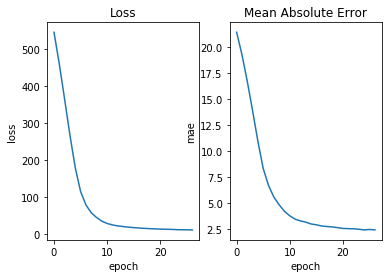

In [51]:
input_shape = (X_train.shape[1],)
early_stop = EarlyStopping(monitor='mean_absolute_error',patience=2)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=input_shape))
model.add(Dense(64, activation='relu'))
# output layer has no activation function cos having one will contraint the range of values it can generate
# if you want to use an activation function, you can use 'relu'
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
hist = model.fit(X_train,y_train, epochs=200, callbacks=[early_stop], verbose=False)

plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(hist.history['mean_absolute_error'])
plt.xlabel('epoch')
plt.ylabel('mae')
plt.title('Mean Absolute Error')


## Making Predictions With Model

In [52]:
result = model.predict(X_test)
print("TEST TARGETS : ", y_test[:5])
print("PREDICTED TARGETS : ", result[:5])

TEST TARGETS :  [ 7.2 18.8 19.  27.  22.2]
PREDICTED TARGETS :  [[ 8.602223]
 [16.588821]
 [20.531431]
 [32.247078]
 [24.42527 ]]
